# Mathematically modelling Graziani’s circuit according to Steve Keen

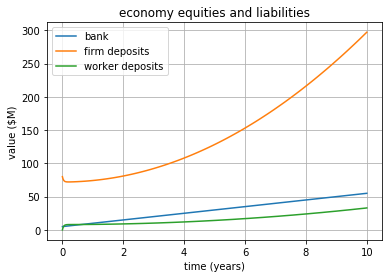

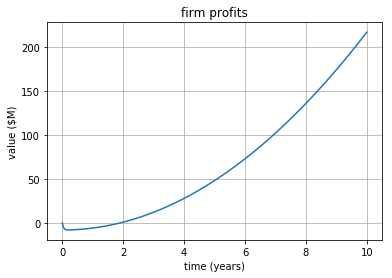

After 10 years, in $M:
safe = 55.0
firm deposits = 297.0
worker deposits = 33.0
loans = 100.0
firm profits = 217.0

During year 10, in $M:
wages = 770.6
loan interests = 5.0
firm costs = 775.568
firm revenue = 818.259
firm profit = 42.690
firm change in deposits = 42.690
part of wages in firm revenue = 94.17%


In [8]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def economy_derivative(t, economy):
    safe = economy[0]
    firm_deposits = economy[1]
    worker_deposits = economy[2]
    loans = economy[3]
    wages = economy[4]
    loan_interests = economy[5]
    firm_costs = economy[6]
    firm_revenue = economy[7]
    firm_profit = economy[8]

    lending_r = 1 / 7
    wages_r = (1 - 0.3) / 0.25
    banker_consumption_r = 1.0
    worker_consumption_r = 1 / 0.04
    repayment_r = 1 / 7
    loans_interest_r = 0.05
    
    deposits = firm_deposits + worker_deposits
    consumption = worker_deposits * worker_consumption_r + safe * banker_consumption_r

    d_wages = firm_deposits * wages_r
    d_loan_interests = loans * loans_interest_r
    d_firm_costs = d_loan_interests + d_wages
    d_firm_revenue = consumption
    d_firm_profit = d_firm_revenue - d_firm_costs

    d_safe = loans * loans_interest_r
    d_loans = loans * lending_r - loans * repayment_r 
    d_firm_deposits =  d_firm_revenue - d_firm_costs + d_loans 
    d_worker_deposits = d_wages - worker_deposits * worker_consumption_r
    
    return [d_safe, d_firm_deposits, d_worker_deposits, d_loans, d_wages, d_loan_interests, d_firm_costs,
            d_firm_revenue, d_firm_profit]

economy0 = [5.0, 80.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]

sol = solve_ivp(economy_derivative, [0, 10], economy0, max_step = 1.0, dense_output=True)

plt.title('economy equities and liabilities')
plt.plot(sol.t, sol.y[0], label='bank')
plt.plot(sol.t, sol.y[1], label='firm deposits')
plt.plot(sol.t, sol.y[2], label='worker deposits')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

plt.title('firm profits')
plt.plot(sol.t, sol.y[8])
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.grid(True)
plt.show()
plt.close()

economy = sol.sol(10)

print('After 10 years, in $M:')
print('safe = %.1f' % economy[0])
print('firm deposits = %.1f' % economy[1])
print('worker deposits = %.1f' % economy[2])
print('loans = %.1f' % economy[3])
print('firm profits = %.1f' % economy[8])
print()

income = economy - sol.sol(9)

print('During year 10, in $M:')
print('wages = %.1f' % income[4])
print('loan interests = %.1f' % income[5])
print('firm costs = %.3f' % income[6])
print('firm revenue = %.3f' % income[7])
print('firm profit = %.3f' % income[8])
print('firm change in deposits = %.3f' % income[1])
print('part of wages in firm revenue = %.2f%%' % (100 * income[4] / income[7]))